In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
import glob
from skimage import feature

from skimage.metrics import structural_similarity as ssim
from sewar.full_ref import rmse, psnr, uqi

# Import helper functions from utils.py
import utils 

In [6]:
test_path = glob.glob("../../data/SWED/test/images/*")
print(test_path[0])
print(len(test_path))

# Load all images and labels
input = []
rgb = []
labels = []

for path in test_path:
    try:
        img, rgb_img, label = utils.load_test(path)
    
        input.append(img)
        labels.append(label)
        rgb.append(rgb_img)
    except:
        print("Error with image: ", path)

# Apply canny edge detection to binary maps to get reference edges
canny_input = [np.uint8(img*255) for img in labels]
edge_reference = [np.uint8(cv2.Canny(img,threshold1 = 100, threshold2 = 200)) for img in canny_input]
#edge_reference = [np.uint8(feature.canny(img, sigma=1)) for img in canny_input]

../../data/SWED/test/images/S2A_MSIL2A_20191105T023901_N0213_R089_T50RPN_20191105T062756_image_0_0.tif
98


In [7]:
def preprocess(img_input):
        """Preprocess image for edge detection
        """
        img = img_input.copy()
        img = np.array(img)

        # Iterate over bands
        for i in range(12):
                img_i = img[:,:,i]

                # Scale bands between 0 and 255
                img[:,:,i] = cv2.normalize(img[:,:,i], None, 0, 255, cv2.NORM_MINMAX)
                img_i = np.uint8(img_i)
 
                img[:,:,i] = img_i
       
        img = np.uint8(img)
        return img

def canny_ed(img_input, threshold1=100, threshold2=200):

    """Apply canny edge detection to image"""
    
    img = img_input.copy()
    img = np.array(img)
    img = np.uint8(img)

    # Iterate over bands
    for i in range(12):
        img_i = img[:,:,i]

        #kernel = (5, 5)
        #img_i = cv2.GaussianBlur(img_i, kernel,0)

        img_i = cv2.Canny(img_i,threshold1 = threshold1, threshold2 = threshold2)
        #img_i = feature.canny(img_i, sigma=2, low_threshold=threshold1, high_threshold=threshold2)


        img[:,:,i] = img_i

    return img

/var/folders/_j/wkrsnnnn2lj6cds3dhhlkkh40000gn/T/ipykernel_43760/2754445272.py:29: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_ = round(ssim(ref_img,img,multichannel=True),2)


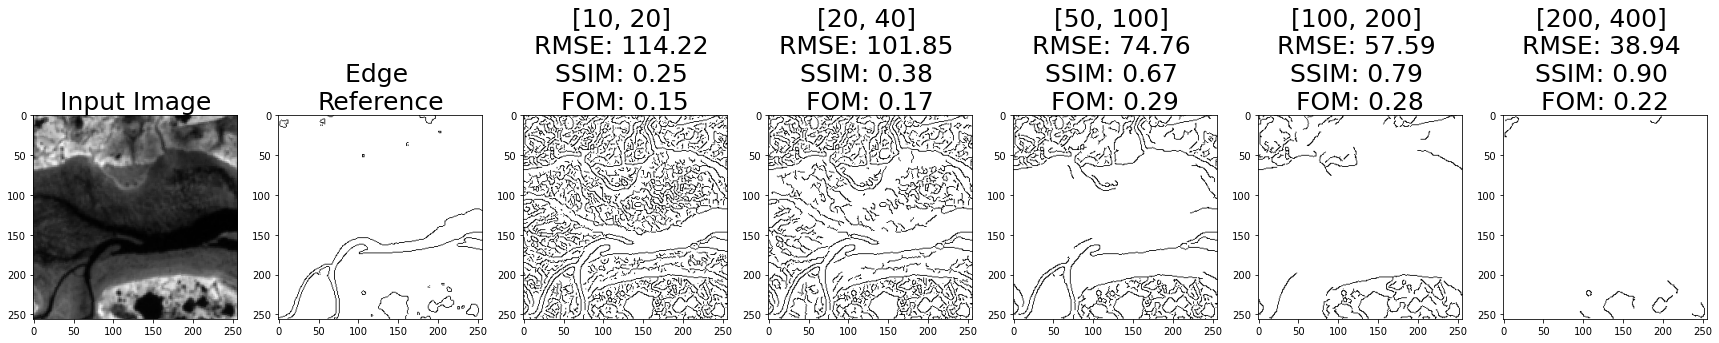

In [20]:
fig, axs = plt.subplots(1, 7, figsize=(30, 20))
fig.set_facecolor('white')

rint = 68
rint = np.random.randint(0, len(input))
band = 10 

img_input = input[rint].copy()
img_input = preprocess(img_input)

axs[0].imshow(img_input[:,:,band],cmap="gray")
axs[0].set_title("Input Image",size=25)

ref_img = edge_reference[rint]
axs[1].imshow(255-ref_img,cmap="gray")
axs[1].set_title("Edge \nReference",size=25)

thresholds = [[10,20],[20,40],[50,100],[100,200],[200,400]]

for i,threshold in enumerate(thresholds):
        
    t1 = threshold[0]
    t2 = threshold[1]
    canny = canny_ed(img_input,threshold1=t1,threshold2=t2)
    img = canny[:,:,band]
    
    axs[i+2].imshow(255-img,cmap="gray")
    rmse_ = round(rmse(ref_img,img),2)
    ssim_ = round(ssim(ref_img,img,multichannel=True),2)
    fom_ = round(utils.fom(ref_img,img),2)

    
    axs[i+2].imshow(255-img,cmap="gray")
    axs[i+2].set_title("{} \nRMSE: {:.2f} \nSSIM: {:.2f} \nFOM: {:.2f}".format(threshold,rmse_,ssim_,fom_),size=25)

In [12]:
utils.fom(ref_img,img)

3.392266819074119e-06

In [63]:
ref_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)